# K Means Clustering Practice
- Unsupervised learning 
- Not predicting the outcome, but trying to find patterns in the data
- Attempt to group similar clusters together in data
- Choose number of clusters 'K'
    - For each cluster, complete the central point
    - Assign each data point to the cluster for which the central point is the closest
    - Using the 'elbow' method to decide K Value

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd

In [28]:
data = make_blobs(n_samples = 200, n_features=2, centers=4, cluster_std=1.8, random_state=101)

In [29]:
number_of_columns = data[0].shape[1]

# Printing the number of columns or features
print("There are {} columns in 'data'".format(number_of_columns))

There are 2 columns in 'data'


In [30]:
# Convert the data to a pandas DataFrame
df = pd.DataFrame(data[0], columns=['Feature1','Feature2'])
df.head()

,Feature1,Feature2
0,-6.428841,10.141117
1,5.868679,5.201104
2,-0.376109,3.264279
3,2.166792,9.563005
4,5.095086,7.207527


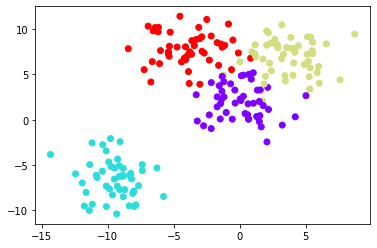

In [31]:
# Original data
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='rainbow') # Get all rows in the first column, and rows in the second columm

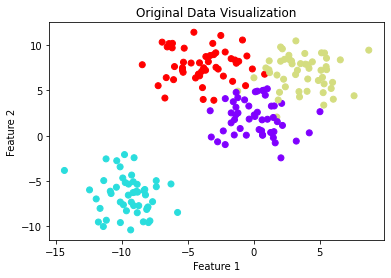

In [32]:
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='rainbow')
plt.title('Original Data Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show() 

In [33]:
from sklearn.cluster import KMeans

In [34]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data[0]) # Fit to your features

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. KMeans KMeans(n_clusters=4)

In [35]:
kmeans.cluster_centers_

array([[ 3.71749226, 7.01388735],
 [-9.46941837, -6.56081545],
 [-0.0123077 , 2.13407664],
 [-4.13591321, 7.95389851]])

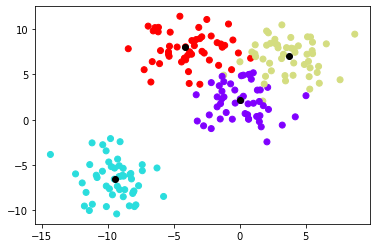

In [36]:
# Original data
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black')  # add the cluster centers

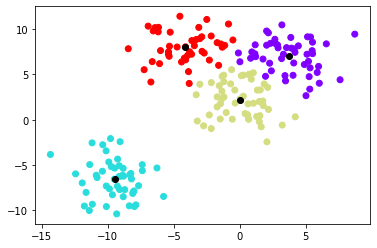

In [37]:
# K means
plt.scatter(data[0][:,0], data[0][:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black')  # add the cluster centers

# K Means Clustering - Cluster universities into Private and Public

In [64]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [65]:
data = pd.read_csv('/data/notebook_files/College_Data')
data

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [66]:
private_counts = data['Private'].value_counts()
private_counts

Yes 565
No 212
Name: Private, dtype: int64

We will use a data frame with 777 observations on the following 18 variables.
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [68]:
data.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [69]:
features = ['Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate']

In [70]:
data = data.drop('Private', axis = 1)
school_name = data.pop('Unnamed: 0')
data

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


1. Scale the large data, so that the data could be more central, ensure that no one column dominates the other
2. Initialize random centroids
3. Label each data point
4. Update centroids
5. Repeat step 3 and 4 until centroids stop changing

In [71]:
# Scale data using min max scaling
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1
# Make all the minimum values to zero, by subtracting min values from each item
# Rescale everything from 0 to 1
# Rescale so that it could be from 1 to 10 scale

In [72]:
data.describe()
# Everything now is on 1 to 10 scale

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,1.547471,1.667272,2.054705,3.516074,5.628240,2.017273,1.352127,4.765807,4.656642,2.818373,2.498592,7.125706,7.596373,3.796443,4.198359,2.098413,5.621943
std,0.725466,0.840126,1.315492,1.671192,1.958714,1.385658,0.627519,1.870204,1.555843,0.662187,0.930327,1.546878,1.743437,0.955098,1.742597,0.885930,1.431476
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.130277,1.182344,1.293063,2.326316,4.164835,1.243683,1.038745,3.315083,3.577711,2.500000,1.824427,6.115789,6.565789,3.171582,2.828125,1.604841,4.583333
50%,1.276863,1.355777,1.564889,3.084211,5.450549,1.447943,1.145088,4.556302,4.433165,2.620321,2.305344,7.347368,7.868421,3.678284,3.953125,1.880710,5.583333
75%,1.664133,1.806154,2.227466,4.221053,6.934066,2.104431,1.398168,5.920713,5.639029,3.021390,2.992366,8.294737,9.052632,4.378016,5.359375,2.296888,6.666667
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [73]:
data

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1.295982,1.397593,1.971213,3.084211,5.252747,1.784472,1.220930,3.370868,3.156368,2.419786,3.679389,6.873684,7.394737,4.764075,2.687500,1.654043,5.166667
1,1.394581,1.634778,1.675319,2.421053,2.978022,1.726765,1.505335,5.620868,7.625158,3.622995,2.717557,2.989474,1.710526,3.340483,3.250000,2.245480,4.833333
2,1.252494,1.351322,1.426144,2.989474,5.054945,1.256253,1.040394,5.142045,3.794767,2.219251,2.257252,5.263158,5.973684,3.509383,5.218750,1.941448,4.666667
3,1.062983,1.094942,1.144408,6.589474,8.912088,1.105987,1.025555,5.936983,6.206494,2.419786,1.858779,8.957895,9.644737,2.254692,6.203125,3.685732,5.083333
4,1.020994,1.025364,1.028315,2.421053,4.461538,1.031425,1.357774,3.426653,4.319672,3.823529,2.717557,7.442105,6.684211,3.268097,1.281250,2.312496,1.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,1.396643,1.494592,1.719207,1.284211,2.681319,1.842750,1.835906,3.071952,4.007566,2.620321,2.305344,5.926316,5.263158,5.463807,2.968750,1.217675,3.500000
773,1.352030,1.593990,1.934403,3.178947,4.758242,1.774187,1.455874,5.267562,5.511349,3.021390,2.374046,7.157895,7.039474,3.605898,5.359375,2.018474,7.083333
774,1.377898,1.631693,1.934403,4.126316,6.142857,1.758189,1.068010,3.119835,4.433165,3.089572,1.729618,6.589474,7.039474,3.871314,3.812500,1.871548,4.250000
775,2.991461,1.816094,2.815007,9.905263,9.901099,2.450673,1.033799,9.135331,7.710277,3.141711,3.562595,9.336842,9.526316,1.796247,7.890625,7.311384,8.416667


In [74]:
# Initialize random centroids
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample())) # Iterate through each col, pick a random value
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)   # Combine the pandas series into a dataframe

In [75]:
centroids = random_centroids(data, 2) # Create 2 centroids
centroids

,0,1
Apps,2.075396,1.115844
Accept,1.688590,1.217648
Enroll,2.049080,1.569136
Top10perc,2.231579,9.431579
Top25perc,10.000000,7.725275
F.Undergrad,2.240414,1.282250
P.Undergrad,1.011953,1.002061
Outstate,3.128667,3.076136
Room.Board,7.812421,4.787831
Books,3.021390,3.021390


In [76]:
# A function to label each data point according to the centroids
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [77]:
labels = get_labels(data, centroids)
labels  # Assign the school to each cluster

0 0
1 0
2 1
3 1
4 0
 ..
772 0
773 0
774 0
775 1
776 0
Length: 777, dtype: int64

In [78]:
# Convert labels Series to DataFrame
labels_df = pd.DataFrame(labels)

# Concatenate school_name to labels_df along the column axis
combined_df = pd.concat([labels_df, school_name], axis=1)

combined_df

,0,Unnamed: 0
0,0,Abilene Christian University
1,0,Adelphi University
2,1,Adrian College
3,1,Agnes Scott College
4,0,Alaska Pacific University
...,...,...
772,0,Worcester State College
773,0,Xavier University
774,0,Xavier University of Louisiana
775,1,Yale University


In [79]:
# Rename the 'labels' column to 'cluster_label'
combined_df = combined_df.rename(columns={0: 'cluster_label'})

In [80]:
combined_df['cluster_label'].value_counts()

0 568
1 209
Name: cluster_label, dtype: int64

<ipython-input-81-51b98de33ceb>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(combined_df['cluster_label'], combined_df['Unnamed: 0'], cmap='rainbow', alpha=0.6)


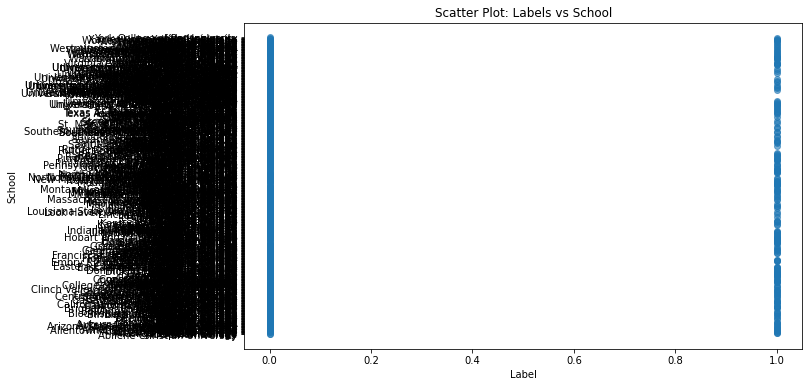

In [81]:
plt.figure(figsize=(10,6))
plt.scatter(combined_df['cluster_label'], combined_df['Unnamed: 0'], cmap='rainbow', alpha=0.6)
plt.xlabel('Label')
plt.ylabel('School')
plt.title('Scatter Plot: Labels vs School')
plt.show()
# We are clearly no where near to the correct prediction, but this is just 2 random centroids

In [82]:
# We're going to update the centroids
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids
# Re-calculating centroids using the mean of log values in each label group.
# np.log(x).mean() calculates the mean of the log values in each group, np.exp then transforms the mean log values back to their original scale
# .T tranposes the resulting DataFrame matching our original centroids structure. If not, the row and col labels would switch

centroids

,0,1
Apps,2.075396,1.115844
Accept,1.688590,1.217648
Enroll,2.049080,1.569136
Top10perc,2.231579,9.431579
Top25perc,10.000000,7.725275
F.Undergrad,2.240414,1.282250
P.Undergrad,1.011953,1.002061
Outstate,3.128667,3.076136
Room.Board,7.812421,4.787831
Books,3.021390,3.021390


In [83]:
# Plot out the changes in each step of our iterations
from sklearn.decomposition import PCA # Principle component analysis, because several features, turning into 2D 
from IPython.display import clear_output  # Clear the output then put a new graph in

In [84]:
def plot_clusters(data, labels, centroids, iterations):
    pca = PCA(n_components=2)  # we're passing in several column, and expecting to return 2 dimensional
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration{iterations}')
    plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

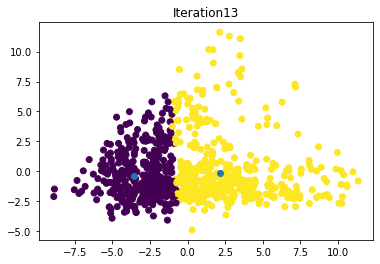

In [86]:
# Body of our algorithm
max_iterations = 100
k = 2 # Number of clusters

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()   # Stop the iteration when values aren't changing anymore
iteration = 1  # Starting iteration #1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [90]:
centroids

,0,1
Apps,1.288750,1.596773
Accept,1.378258,1.699706
Enroll,1.633214,1.976460
Top10perc,2.324953,4.214996
Top25perc,4.016537,6.694546
F.Undergrad,1.609811,1.875908
P.Undergrad,1.298741,1.258881
Outstate,3.405681,5.513524
Room.Board,3.668561,5.156899
Books,2.691003,2.815954


In [96]:
# Uses K Means algo to compare with our result
 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)

kmeans.fit(data[features])

data['kmeans_labels'] = kmeans.labels_

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

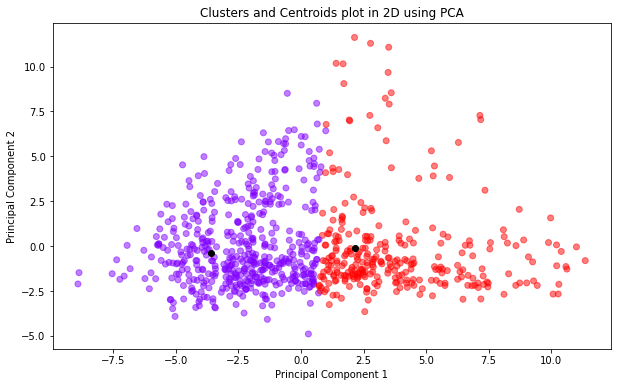

In [97]:
# Use scatter plot to  visualize these points and its centroids 
from sklearn.decomposition import PCA

# Instantiate a PCA object with n_components=2
pca = PCA(n_components=2)

# Fit and transform the multi-dimensional dataset to 2D
data_2d = pca.fit_transform(data[features])

# Transform Centroids from multi-dimension to 2D using PCA
centroids_2d = pca.transform(centroids.T)

# Create a scatterplot for the 2D representation of our data
plt.figure(figsize=(10,6))

# Scatter Plot for the data points
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=data['kmeans_labels'], alpha=0.5, cmap='rainbow')

# Scatter Plot for the Centroids points
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], color='black')

plt.xlabel('Principal Component 1') 
plt.ylabel('Principal Component 2')
plt.title('Clusters and Centroids plot in 2D using PCA')
plt.show()